In [4]:
OPENSLIDE_PATH = r"C:\Users\MS\openslide-bin-4.0.0.8-windows-x64\bin"

import os

if hasattr(os, "add_dll_directory"):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
    print(openslide.__version__)
else:
    print("nope")
    import openslide

1.3.1


In [3]:
import openslide
import numpy as np
import matplotlib.pyplot as plt

output = "C:\\Users\\MS\\Desktop\\IDEAS\\Projekty\\CD34\\Dane\\CD34_z_adnotacjami\\22_09617A1_7.mrxs"
slide = openslide.OpenSlide(output)
# Informacje o obrazie
print(f"Dimensions: {slide.dimensions}")
print(f"Level count: {slide.level_count}")

Dimensions: (90122, 204698)
Level count: 9


In [2]:
import xml.etree.ElementTree as ET
from asap_loader.annotation.objects.rectangle import Rectangle
from asap_loader.annotation.objects.group import Group
from pathlib import Path
from os import listdir

ROOT = "C:\\Users\\MS\\Desktop\\IDEAS\\Projekty\\CD34\\Dane\\CD34_zestaw3"

filenames = listdir(ROOT)
filename = "25_08314A1_7"
xml_path = Path(ROOT, f"{filename}.xml")

tree = ET.parse(xml_path)
root = tree.getroot()


for child in root.find('AnnotationGroups'):
    group_data = {}
    if child.attrib["Name"] == "Obszary":
        group_data["name"] = child.attrib["Name"]
        group_data["color"] = child.attrib["Color"]
        group_data["group"] = (
            None if child.attrib["PartOfGroup"] == "None" else child.attrib["PartOfGroup"]
        )

        group = Group(**group_data)


for child in root[0]:
    if "Type" in child.attrib and child.attrib["Type"] == "Rectangle":

        rectangle_data = {
            "name": child.attrib["Name"],
            "color": child.attrib["Color"],
            "group": group
        }

        for coord in child[0]:
            # print(coord.attrib)
            if int(coord.attrib['Order']) == 0:
                rectangle_data["x_min"] = float(coord.attrib["X"])
                rectangle_data["y_min"] = float(coord.attrib["Y"])

            elif int(coord.attrib['Order']) == 2:
                temp_x = float(coord.attrib["X"])
                temp_y = float(coord.attrib["Y"])

        rectangle_data["x_max"] = max(temp_x, rectangle_data["x_min"])
        rectangle_data["y_max"] = max(temp_y, rectangle_data["y_min"])
        rectangle_data["x_min"] = min(temp_x, rectangle_data["x_min"])
        rectangle_data["y_min"] = min(temp_y, rectangle_data["y_min"])

        rectangle = Rectangle(**rectangle_data)

        # print(rectangle)

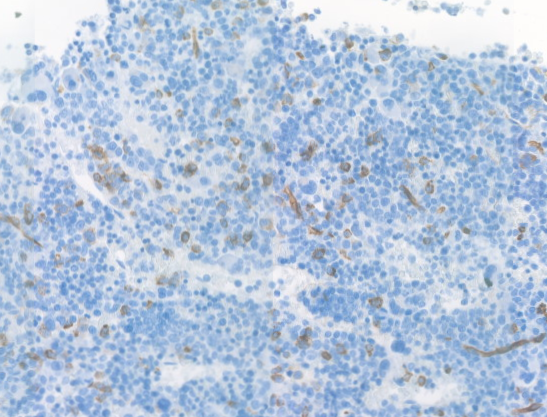

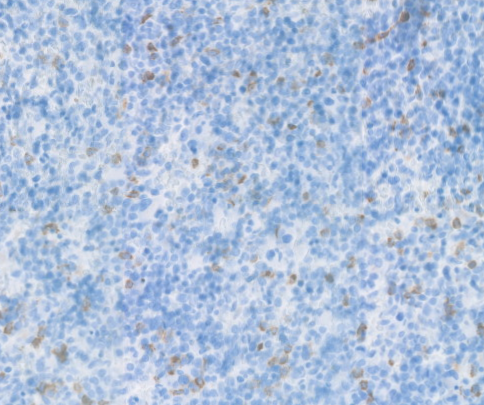

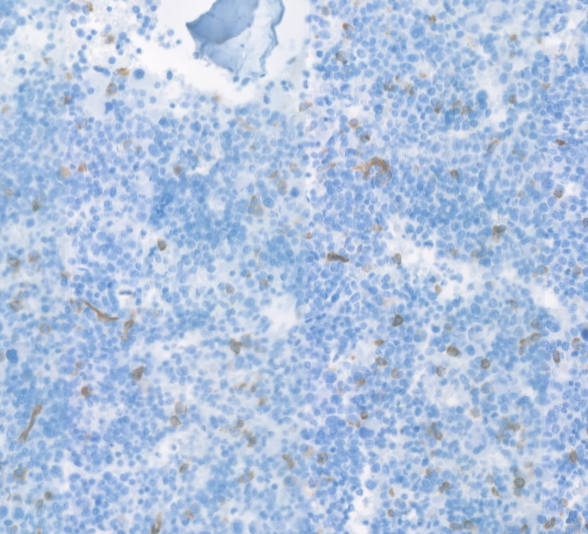

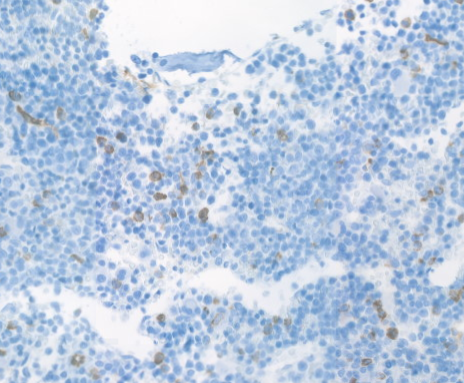

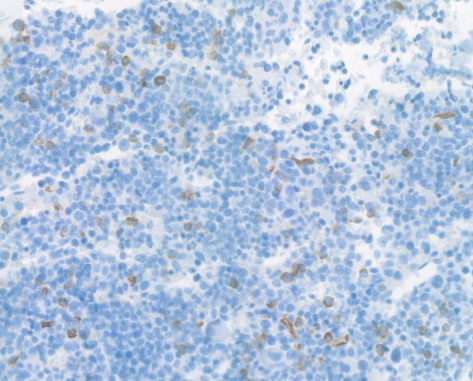

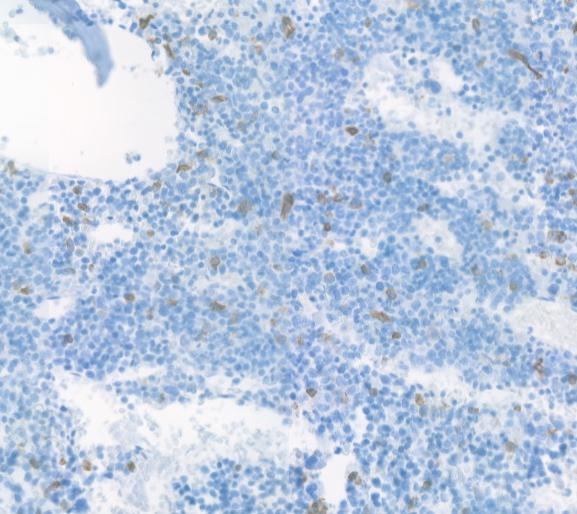

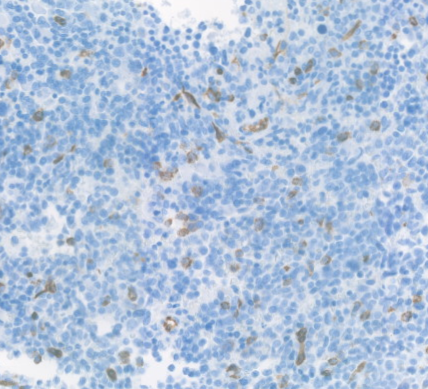

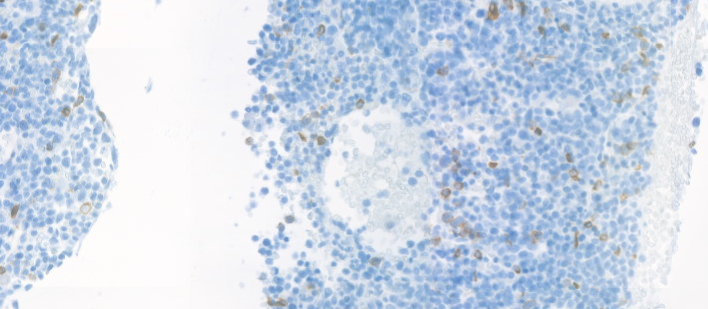

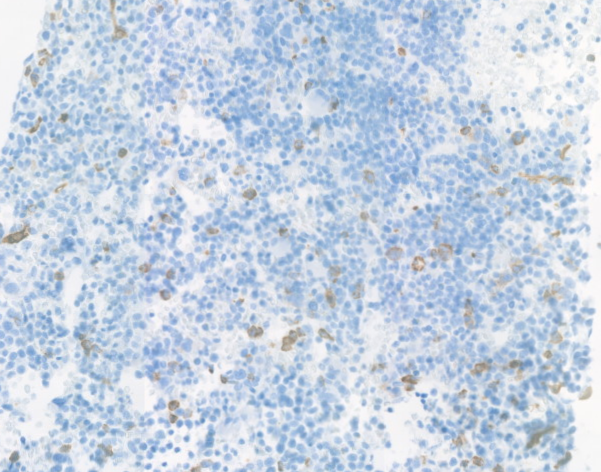

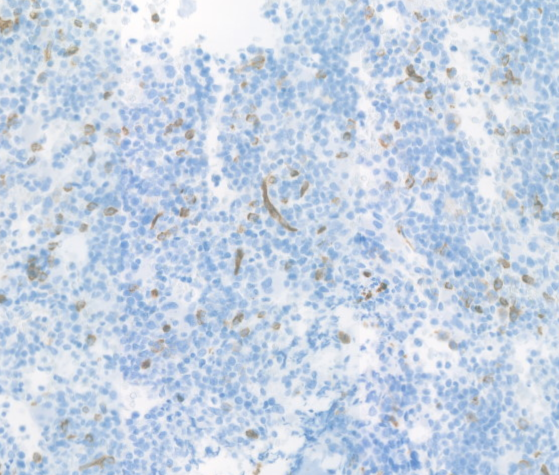

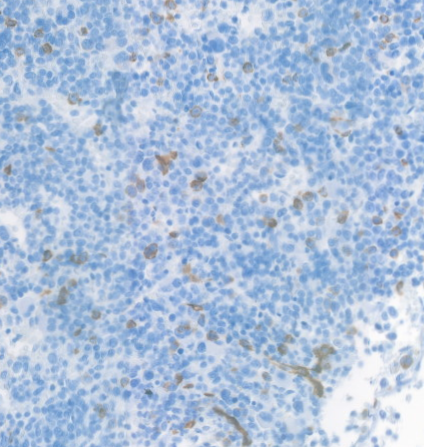

In [5]:
from histolab.slide import Slide, CoordinatePair
from PIL import ImageDraw
from PIL.Image import Image
from IPython.display import display


slide_path = Path(ROOT, f"{filename}.mrxs")
slide = Slide(slide_path, "")

level = 2
downsample_ratio = slide.level_dimensions()[0] / slide.level_dimensions(level=level)[0]

for rect in group.members:
    base_size = (rect.x_max - rect.x_min, rect.y_max - rect.y_min)
    coordinates = CoordinatePair(
        int(rect.x_min),
        int(rect.y_min),
        int(rect.x_max),
        int(rect.y_max),
    )
    # print(coordinates)
    image = slide.extract_tile(
        coordinates,
        (
            int(base_size[0] / downsample_ratio),
            int(base_size[1] / downsample_ratio),
        ),
        level=level,
    ).image

    draw = ImageDraw.Draw(image)

    display(image)

In [13]:
import pandas as pd

DATA = "C:\\Users\\MS\\Desktop\\IDEAS\\Projekty\\CD34\\Dane\\CD34_ROI_zestaw3"
df = pd.read_csv(f"{DATA}\\ROI_description.csv")

df[df['slide'] == "23_08116A1_7"]

slide  roi_id       x_min        y_min                    path  \
50  23_08116A1_7       0  22795.3633  105255.0470  23_08116A1_7_ROI_0.png   
51  23_08116A1_7       1  32892.0469  100039.2730  23_08116A1_7_ROI_1.png   
52  23_08116A1_7       2  40065.4492   98258.2422  23_08116A1_7_ROI_2.png   
53  23_08116A1_7       3  29891.7129  103715.7030  23_08116A1_7_ROI_3.png   
54  23_08116A1_7       4  19081.8398  104855.5940  23_08116A1_7_ROI_4.png   
55  23_08116A1_7       5  25110.1484  103142.2110  23_08116A1_7_ROI_5.png   
56  23_08116A1_7       6  47356.6914   93828.9609  23_08116A1_7_ROI_6.png   
57  23_08116A1_7       7  29053.5898   99590.5000  23_08116A1_7_ROI_7.png   
58  23_08116A1_7       8  15451.5039  106975.3910  23_08116A1_7_ROI_8.png   
59  23_08116A1_7       9  26688.0449  103488.6410  23_08116A1_7_ROI_9.png   

        width    height  
50   924.6367  650.2420  
51   705.2383  598.0860  
52   762.6992  510.2969  
53   541.5000  386.9300  
54  1248.6934  926.5390  
55   752.2461  548.7110  
56   749.6445  678.8125  
57   564.9903  592.8750  
58   672.5527  715.5620  
59   788.7383  671.9680